# Markov Chains

A markov chain allows us to predict the outcome of an event given previous outcomes. 

## Example 
Let's consider that we had a simple bike sharing program with only 3 stations; A, B and C.

Assuming each bike needs to be returned at the end of the day, such that all bikes are at some station.

We want to model the movement of bikes from day to day. We find that over a one day period the

- of the bikes borrowed from station A, 30% are returned to station A, 50% end up at station B, and 20% end up at station C.
- of the bikes borrowed from station B, 10% end up at station A, 60% have been returned to station B, and 30% end up at station C
- of the bikes borrowed from station C, 10% end up at station A, 10% end up at station B, and 80% are returned to station C.
This can be shown in a diagram as
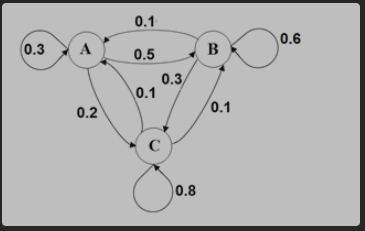

We can represent the following as a Transition Matrix of Probability. This matrix gives us the change in probability in each type of change in a given system.
$$T = \begin{bmatrix}
    \ &A & B & C \\
    A & 0.3 & 0.5 & 0.2 \\
    B & 0.1 & 0.6 & 0.3 \\
    C & 0.1 & 0.1 & 0.8
\end{bmatrix}
$$

## Properites of Transition Matrix
- Row: Represents Initial State
- Column: Represents Terminal State
- $T_{ij}$ : The probability of moving from the state represented by row i to the state represented by row j in a single transition $0\le T_{ij} \le 1$ 
- $T_{ij}$ is a [[Conditional Probability]] read as  P(next state is the state in column j | current state is the state in row i)
- Sum of all probabilities from row should equal 1
- Transition matrix represents change over one transition period


## Calculating Change in State
The transition matrix shows the probabilities for transitions between states at two consecutives times. We need a way to represent the distribution among these states at a particular point in time. 

To do this we can set up a **State Vector/State Matrix**($X_0$) which shows the current state. 

For example lets say the current distribution of bikes is 
A: 0.30
B: 0.50
C: 0.20
Our transition vector $X_0 = [0.30,0.5,0.2]$ 

And we are interested in finding the change after one day $X_1$

$$X_1 = \begin{bmatrix} & 0.3 &  0.5 &  0.2 \end{bmatrix} \times \begin{bmatrix}
    & 0.3 & 0.5 & 0.2 \\
    & 0.1 & 0.6 & 0.3 \\
   & 0.1 & 0.1 & 0.8
\end{bmatrix}
$$
$$X_1 = [0.16, 0.47, 0.37]$$


## Nth State Matrix of Markov Chain
If we wanted to calculate the state after 2 days, we would essentially repeat the process but use the value of $X_1$
$$X_2 = \begin{bmatrix} & 0.16 &   0.47 &  0.37 \end{bmatrix} \times \begin{bmatrix}
    & 0.3 & 0.5 & 0.2 \\
    & 0.1 & 0.6 & 0.3 \\
   & 0.1 & 0.1 & 0.8
\end{bmatrix}
$$

This process is tedious but there is a short hand 
$$ X_1=X_0T$$
$$X_2=X_1T =(X_0T)T=X_0T^2$$
$$X_3=X_3T =(X_0T^2)T=X_0T^3$$
$$X_n=X_0T^n$$

In [5]:
import numpy as np
import pandas as pd
## Calculating State 
def calculate_state(initial_state, transition_mat, iter):
  transition_mat = np.linalg.matrix_power(transition_mat,iter)
  result = np.matmul(initial_state, transition_mat)
  return result
V0 = [0.3, 0.5, 0.2]
T = np.array([
    [0.3, 0.5, 0.2],
    [0.1, 0.6, 0.3],
    [0.1, 0.1, 0.8]
])

X_1 = calculate_state(V0,T,1)
X_2 = calculate_state(V0,T,2)
print("X1:", X_1)
print("X2:", X_2)

X1: [0.16 0.47 0.37]
X2: [0.132 0.399 0.469]


## Steady State Matrices
When using Markov chains, after many iterations the state matrix $X_n$ starts to have very little change leading to a constant value

Essentially the matrix stabilized reaching steady state.
Then we can say that $P^nX$ reaches a limit, $\overline{X}$. This limit is called **Steady State Matrix**

In [8]:
import numpy as np
import pandas as pd
## Calculating State 
def calculate_state(initial_state, transition_mat, iter):
  transition_mat = np.linalg.matrix_power(transition_mat,iter)
  result = np.matmul(initial_state, transition_mat)
  return result
V0 = [0.3, 0.5, 0.2]
T = np.array([
    [0.3, 0.5, 0.2],
    [0.1, 0.6, 0.3],
    [0.1, 0.1, 0.8]
])

X_10 = calculate_state(V0,T,10)
X_100 = calculate_state(V0,T,100)
print("X50:", X_10)
print("X100:", X_100)

X50: [0.12500002 0.30042315 0.57457683]
X100: [0.125 0.3   0.575]


## Regular Markov Chains
However not all Markov chains reach steady state. One type of matrix that reaches steady state is the a regular markov chain
## Determining if Matrix Is Regular 
To determine if a Markov chain is regular, we examine its transition matrix T and powers, $T^n$, of the transition matrix. If we find any power n for which $T^n$ has only positive entries (no zero entries), then we know the Markov chain is regular and is guaranteed to reach a state of equilibrium in the long run.

We don't need to examine a lot of powers, there is a theorem that allows us to check, where n is the number of states
$$m\le (n-1)^2+1$$
For a 3x3 (n=3) matrix we need to see all the T up to the 5th power and observe that it contains all positive entries except zero

In [11]:
def regular_matrix(matrix):
    rows, _ = matrix.shape
    max_iter = (rows - 1)**2 + 1

    for i in range(1, max_iter + 1):
        T = np.linalg.matrix_power(matrix, i)
        print(T)
        contains_zero = any(0 in row for row in matrix)
        if contains_zero == True:
          return False
          break
    return True

T_regular = np.array([
    [0.3, 0.5, 0.2],
    [0.1, 0.6, 0.3],
    [0.1, 0.1, 0.8]
])

T_not = np.array([
    [0.3, 0.5, 0.2],
    [1, 0, 0],
    [0.1, 0.1, 0.8]
])

print("The matrix T_regular is regular:", str(regular_matrix(T_regular)))
print("The matrix T_not is regular:", str(regular_matrix(T_not)))

[[0.3 0.5 0.2]
 [0.1 0.6 0.3]
 [0.1 0.1 0.8]]
[[0.16 0.47 0.37]
 [0.12 0.44 0.44]
 [0.12 0.19 0.69]]
[[0.132 0.399 0.469]
 [0.124 0.368 0.508]
 [0.124 0.243 0.633]]
[[0.1264 0.3523 0.5213]
 [0.1248 0.3336 0.5416]
 [0.1248 0.2711 0.6041]]
[[0.12528 0.32671 0.54801]
 [0.12496 0.31672 0.55832]
 [0.12496 0.28547 0.58957]]
The matrix T_regular is regular: True
[[0.3 0.5 0.2]
 [1.  0.  0. ]
 [0.1 0.1 0.8]]
The matrix T_not is regular: False


## Properties of Steady State Matrix

Let $T$ be a transition matrix for a regular Markov chain. The characteristics and the approach to reach the steady state include:

- As we take higher powers of $T^n$, where $n$ approaches infinity, the matrix converges to a state of equilibrium. This equilibrium signifies that the system has reached a steady state where subsequent state probabilities remain constant over time.

- The equilibrium distribution vector $E$ satisfies the condition $ET = E$, meaning it remains unchanged by the application of the transition matrix $T$.

## Solving for the Steady State

The equation to find the steady state, 
$ET = E$
can be approached through the properties of eigenvalues and eigenvectors,
$Av = \lambda v.$

Here, our $\lambda$ (eigenvalue) is set to one, as we seek an eigenvalue that maps the vector back to itself, indicative of a steady state.

Furthermore, an additional requirement must be met:
- All the elements of the eigenvector must sum to 1 to represent a valid probability distribution. This condition ensures that the eigenvector, representing the steady state distribution, is indeed a probability vector, with all values contributing to a total probability of 1.

In [21]:
def determine_orientation(matrix):
    # Calculate the sum of elements across rows and columns
    row_sums = np.sum(matrix, axis=1)
    column_sums = np.sum(matrix, axis=0)

    # Check if all row sums are close to 1
    if np.allclose(row_sums, 1, atol=1e-8):
        orientation = "Row"
    # Check if all column sums are close to 1
    elif np.allclose(column_sums, 1, atol=1e-8):
        orientation = "Column"
    # Handle the case where neither condition is met
    else:
        orientation = "Error: sum of row or column does not equal 1"
    return orientation
def regular_matrix(matrix):
    rows, _ = matrix.shape
    max_iter = (rows - 1)**2 + 1

    for i in range(1, max_iter + 1):
        T = np.linalg.matrix_power(matrix, i)
        # print(T)
        contains_zero = any(0 in row for row in matrix)
        if contains_zero == True:
          return False
          break
    return True

def steady_state_matrix(matrix):
    if not regular_matrix(matrix):
        return "Cannot compute steady state: matrix is not regular."

    orientation = determine_orientation(matrix)
    #print(orientation)
    if orientation == "Row":
        matrix = matrix.T

    rows, columns = np.shape(matrix)
    A = np.vstack((matrix - np.eye(columns), np.ones(columns)))  # Subtracting identity matrix and adding a row of ones

    b = np.zeros((columns + 1, 1))  # Creating b with an extra row for the sum constraint
    b[-1] = 1  # Setting the last row to 1 to enforce sum of probabilities

    result, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)  # Solving the system
    return result



In [20]:
T = np.array([
    [0.3, 0.5, 0.2],
    [0.1, 0.6, 0.3],
    [0.1, 0.1, 0.8]
])
steady_state = steady_state_matrix(T)
print("Steady State: \n", steady_state)

Steady State: 
 [[0.125]
 [0.3  ]
 [0.575]]


# Souces
- https://math.libretexts.org/Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/10%3A_Markov_Chains
- Elementary Linear Algebra by Ron Larson Chapter 2.5